# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Upload file
dataset = files.upload()

# Pastikan file yang diupload sesuai dengan nama file yang Anda miliki
file_name = list(dataset.keys())[0]  # Ambil nama file pertama yang diupload
df_clustered = pd.read_csv(io.BytesIO(dataset[file_name]))  # Baca dataset

# Menampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
print("\n=== 5 Baris Pertama Dataset Hasil Clustering ===")
print(df_clustered.head())  # Menampilkan semua kolom terlebih dahulu

# Menampilkan informasi dataset
print("\n=== Informasi Dataset Hasil Clustering ===")
print(df_clustered.info())

Saving Dataset_inisiasi .csv to Dataset_inisiasi .csv

=== 5 Baris Pertama Dataset Hasil Clustering ===
              company  rank  rank_change   revenue    profit  \
0             Walmart     1          0.0 -0.224712 -0.193665   
1              Amazon     2          0.0 -0.224712 -0.193665   
2               Apple     3          0.0 -0.224712 -0.193665   
3          CVS Health     4          0.0 -0.224712 -0.193665   
4  UnitedHealth Group     5          0.0 -0.224712 -0.193665   

   num. of employees  sector         city  state  newcomer  ...  prev_rank  \
0          -0.167089      16  Bentonville      1         0  ...        1.0   
1          -0.167089      16      Seattle     44         0  ...        2.0   
2          -0.167089      17    Cupertino      3         0  ...        3.0   
3          -0.167089       9   Woonsocket     37         0  ...        4.0   
4          -0.167089       9   Minnetonka     22         0  ...        5.0   

                   CEO                    

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Gunakan variabel df_clustered dari kode sebelumnya
df = df_clustered  # Ubah df menjadi df_clustered

# Memisahkan data menjadi training (80%) dan testing (20%) dengan stratifikasi berdasarkan cluster
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Cluster"])

# Menyimpan hasil splitting ke file CSV
train_df.to_csv("train_dataset.csv", index=False)
test_df.to_csv("test_dataset.csv", index=False)

print("Dataset berhasil dibagi:")
print(f"Training set: {train_df.shape[0]} sampel")
print(f"Test set: {test_df.shape[0]} sampel")

Dataset berhasil dibagi:
Training set: 800 sampel
Test set: 200 sampel


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
#Model Random forest
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=["Cluster"])  # Semua kolom kecuali 'Cluster'
y = df["Cluster"]  # Kolom target

# Mengonversi data kategorikal menjadi numerik menggunakan One-Hot Encoding
X = pd.get_dummies(X)

# Membagi ulang data menjadi train-test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)





RandomForestClassifier(random_state=42)

In [5]:
#membangun model svm
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=["Cluster"])  # Semua kolom kecuali 'Cluster'
y = df["Cluster"]  # Kolom target

# Mengonversi data kategorikal menjadi numerik menggunakan One-Hot Encoding
X = pd.get_dummies(X)

# Membagi data menjadi train-test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menangani nilai NaN dengan menggantinya menggunakan mean
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model SVM
svm_model = SVC(kernel="rbf", C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi Model: 0.9550

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        29
           1       0.94      1.00      0.97       136
           2       1.00      0.91      0.96        35

    accuracy                           0.95       200
   macro avg       0.97      0.90      0.93       200
weighted avg       0.96      0.95      0.95       200

Rata-rata F1 Score: 0.9536


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


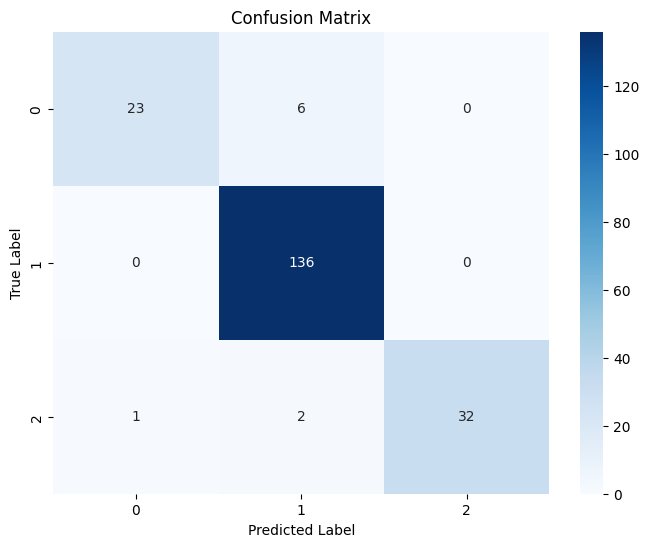

In [7]:
# Evaluasi model random forest
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1_avg = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi Model: {accuracy:.4f}")
print("\nLaporan Klasifikasi:\n", report)
print(f"Rata-rata F1 Score: {f1_avg:.4f}")

# Menampilkan Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Akurasi SVM: 0.7250

Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.73      0.99      0.84       136
           2       0.69      0.31      0.43        35

    accuracy                           0.72       200
   macro avg       0.47      0.43      0.42       200
weighted avg       0.62      0.72      0.64       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


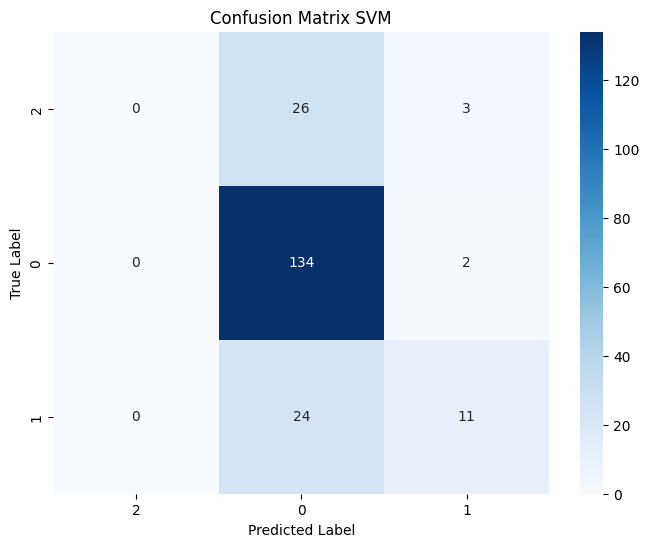

In [8]:
# Evaluasi model svm
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi SVM: {accuracy_svm:.4f}")

# Laporan klasifikasi
print("\nLaporan Klasifikasi SVM:")
print(classification_report(y_test, y_pred_svm))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix SVM")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Tunning Model Random forest

# Definisikan parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat model RandomForest
model = RandomForestClassifier(random_state=42)

# Lakukan GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.9662499999999999


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Akurasi Model setelah Tuning: 0.9650
Rata-rata F1 Score: 0.9536

Laporan Klasifikasi setelah Tuning:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        29
           1       0.95      1.00      0.97       136
           2       1.00      0.97      0.99        35

    accuracy                           0.96       200
   macro avg       0.98      0.92      0.95       200
weighted avg       0.97      0.96      0.96       200



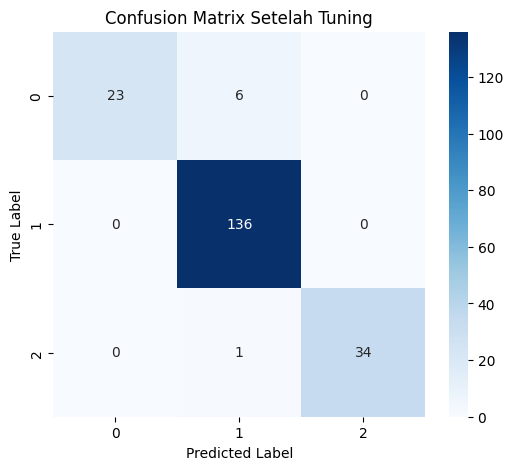

In [ ]:
#Evaluasi Model Random forest

# Gunakan model terbaik setelah tuning
best_model = grid_search.best_estimator_

# Evaluasi model setelah tuning
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)
f1_avg = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi Model setelah Tuning: {accuracy_tuned:.4f}")
print(f"Rata-rata F1 Score: {f1_avg:.4f}")
print("\nLaporan Klasifikasi setelah Tuning:\n", report_tuned)


cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Setelah Tuning")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
## 1. Perbandingan sebelum dan sesudah tuning:
- Accuracy sebelum tuning: 0.9550 → sesudah tuning: 0.9650
- F1 Score sebelum tuning: 0.9536 → sesudah tuning: 0.9536

## 2. Analisis Detail:
- Periksa classification report untuk melihat kelas dengan performa rendah. Jika terdapat kelas dengan precision atau recall rendah, pertimbangkan:
- Mengumpulkan data tambahan untuk kelas tersebut
- Mencoba algoritma lain atau melakukan feature engineering lebih lanjut
- Menggunakan teknik resampling untuk mengatasi ketidakseimbangan kelas (jika ada)

## 3. Rekomendasi Tindakan Lanjutan:

- Jika hasil belum memuaskan, Anda dapat mencoba:
- Mencoba algoritma klasifikasi lain sepertiDecision Tree, atau KNN
- Melakukan tuning lebih lanjut pada hyperparameter
- Melakukan feature engineering atau menambah data untuk meningkatkan performa model